### imports

In [59]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

import seaborn as sns

%matplotlib inline


[nltk_data] Downloading package punkt to C:\Users\Sulav
[nltk_data]     Bhandari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1513,ham,Hows the champ just leaving glasgow!,NaN,NaN,NaN
333,ham,Any chance you might have had with me evaporat...,NaN,NaN,NaN
1846,ham,Its on in engalnd! But telly has decided it wo...,NaN,NaN,NaN
880,spam,Reminder: You have not downloaded the content ...,NaN,NaN,NaN
438,ham,"Hi hope u get this txt~journey hasnt been gd,n...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

### Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# dropping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
709,spam,4mths half price Orange line rental & latest c...
3515,ham,"Well, I was about to give up cos they all said..."
4453,ham,I'm home. Ard wat time will u reach?
532,ham,Gudnite....tc...practice going on
466,ham,They don't put that stuff on the roads to keep...


In [10]:
# Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
2622,ham,Ok lor...
3842,ham,Yes ammae....life takes lot of turns you can o...
3084,ham,In da car park
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
5396,ham,As in i want custom officer discount oh.


In [11]:
encoder =LabelEncoder()

df['target']=encoder.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Checking missing and duplicate values

In [12]:
# checking missing values
df.isnull().any()
# we can also do 
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# checking duplicated values
df.duplicated().any()
df.duplicated().sum()

403

In [14]:
# Removing duplicate values
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()


0

In [15]:
df.shape

(5169, 2)

### Exlporatory Data Analysis (EDA)

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

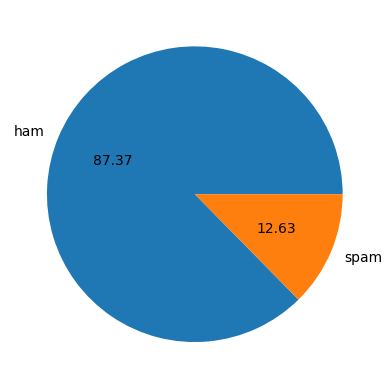

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct= '%0.2f')
plt.show()
# Observing the pie chart we can know that the dataframe is imbalanced.

In [24]:
# checking if the msgs are numm or not
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# number of words in each msg
# df['text'].apply(lambda x: len(x.split()))
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
# number of sentences in each msg
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
# visualizing the distribution 
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
# For ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
# For spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plotting histographs

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

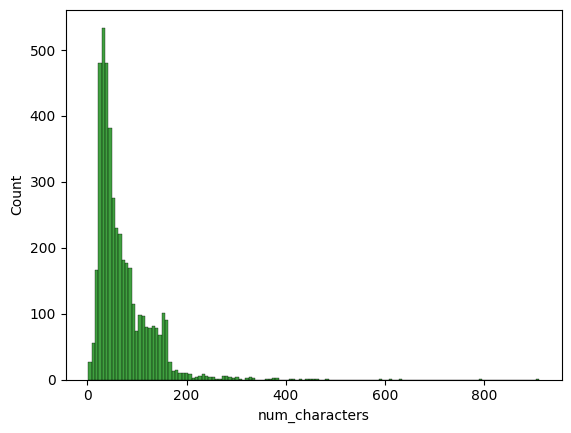

In [58]:
sns.histplot(df[df['target']==0]['num_characters'],color='green',label='ham')

# sns.histplot(df[df['target']==1]['num_characters'],color='red',label='spam')